<a href="https://colab.research.google.com/github/nxthuan512/Reinforcement-Learning-An-Introduction/blob/master/Chapter_1_Multi_armed_Bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

This notebook shows the codes of the action-value methods mentioned in the **Reinforcement Learning - An Introduction** *(Sutton and Barton March 2018)* textbook. Those code are mainly based on the **Artificial Intelligence: Reinforcement Learning in Python** *Lazy Programmer*.

References:
1.   [Reinforcement Learning - An Introduction](https://github.com/t0nberryking/Reinforcement-Learning) textbook
2.   [Artificial Intelligence: Reinforcement Learning in Python](https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python) course

# Action-Value Methods

## 1. Epsilon-Greedy
Ref. 1, Chapter 2.4, pp. 51/548

In [0]:
from __future__ import print_function, division
from builtins import range
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# =====================================================
# Class Bandit
# =====================================================
class Bandit:
    def __init__(self, m):
        self.m = m
        self.mean = 0   # 
        self.N = 0      # Number of experiments
    
    # Generate random value whenever pulling    
    def pull(self):
        return np.random.randn() + self.m
    
    # Update the mean
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + (1.0/self.N)*x

In [0]:
# =====================================================
# Run experiment
#    N: Number of experiments
# =====================================================
def run_epsGreedy (m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    
    reward = np.empty(N)
    
    for i in range (N):
        # Agency selects action based on epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
        
        # Environment generates state
        x = bandits[j].pull()
        
        #
        bandits[j].update(x)
        
        # Agency obtains the reward
        reward[i] = x
    
    # Accumulate average reward
    cumm_reward = np.cumsum(reward) / (np.arange(N) + 1)
    
    # Plot 
    plt.plot(cumm_reward)
#     plt.plot(np.ones(N)*m1)
#     plt.plot(np.ones(N)*m2)
#     plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    # plt.show()

    print('run_epsGreedy: average award')
    for b in bandits:
        print(b.mean)

    return cumm_reward

run_epsGreedy: average award
1.0100270555298398
2.0088591975391563
3.0023508247634867
run_epsGreedy: average award
0.983729457126504
2.037778317026054
3.0028122051915696
run_epsGreedy: average award
0.899519669153716
1.9483918569316692
3.0006019874682037


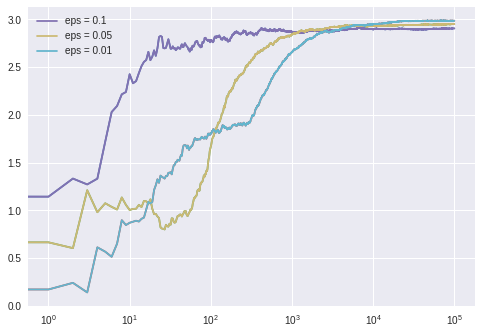

In [5]:
# =====================================================
# Main function
# =====================================================
if __name__ == '__main__':
    epsGreedy_1 = run_epsGreedy(1.0, 2.0, 3.0, 0.1, 100000)
    epsGreedy_05 = run_epsGreedy(1.0, 2.0, 3.0, 0.05, 100000)
    epsGreedy_01 = run_epsGreedy(1.0, 2.0, 3.0, 0.01, 100000)
    
    # log scale plot
    plt.plot(epsGreedy_1, label='eps = 0.1')
    plt.plot(epsGreedy_05, label='eps = 0.05')
    plt.plot(epsGreedy_01, label='eps = 0.01')
    plt.legend()
    plt.xscale('log')
    plt.show()